In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [121]:
# 얼굴 이미지 하나를 불러와서 OpenCV 창으로 확인
image1 = cv2.imread("faces/img01.jpg")
cv2.imshow("FACE", image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [122]:
# 얼굴 이미지를 모두 불러와서 리스트에 저장
face_image = []  # 빈 리스트 생성
face_image.clear()  # 혹시 모를 이전 데이터 초기화

for i in range(15):  # img01.jpg ~ img15.jpg까지 반복
    file = "./faces/img{0:02d}.jpg".format(i+1)  # 파일 이름 생성
    image = cv2.imread(file)  # 이미지 읽기
    image = cv2.resize(image, (64, 64))  # 크기를 (64x64)로 조정
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB 색상 변환
    face_image.append(image)  # 리스트에 추가

In [123]:
# 이미지를 여러 개 그리드 형태로 출력하는 함수 정의
def show_image(row, col, images):
    (_, ax) = plt.subplots(row, col, figsize=(row, col))  # 그래프 크기 지정
    for i in range(row):
        for j in range(col):
            if row <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
                axis.imshow(images[i*col + j])  # 이미지 출력
    plt.show()

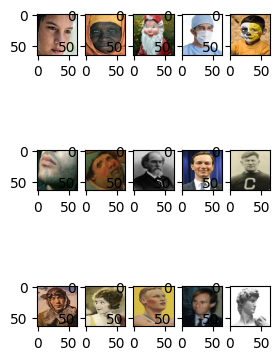

In [124]:
# 얼굴 이미지 15장을 3행 5열로 출력
show_image(3, 5, face_image)

In [125]:
# 동물 이미지를 모두 불러와서 리스트에 저장
animals_image = []  # 빈 리스트 생성
animals_image.clear()

for i in range(15):  # img01.jpg ~ img15.jpg까지 반복
    file = "./animals/img{0:02d}.jpg".format(i+1)
    image = cv2.imread(file)
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    animals_image.append(image)

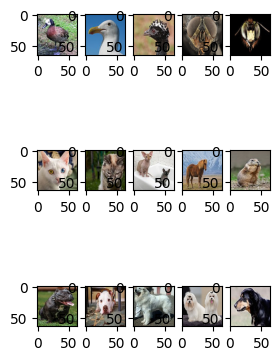

In [126]:
# 동물 이미지 15장을 3행 5열로 출력
show_image(3, 5, animals_image)

In [127]:
# 얼굴 = (1,0), 동물 = (0,1) 형태의 원-핫(one-hot) 라벨 만들기
y = [(1, 0)] * len(face_image) + [(0, 1)] * len(animals_image)

In [128]:
# y의 내용을 출력 (얼굴 15개, 동물 15개)
print(y)

[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


In [130]:
# 리스트를 넘파이 배열로 변환
y = np.array(y)
print(y)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [131]:
# 학습용 데이터(X) 생성: 얼굴 + 동물 이미지 합치기
X = face_image + animals_image
print(X)          # 데이터 확인
print(len(X))     # 총 데이터 개수 출력 (예: 30개)

[array([[[  7,   8,  10],
        [  5,   7,   6],
        [ 14,  14,  14],
        ...,
        [212, 231, 235],
        [215, 235, 236],
        [214, 234, 233]],

       [[ 10,  11,  13],
        [  7,   8,   9],
        [ 12,  12,  12],
        ...,
        [206, 225, 229],
        [202, 222, 223],
        [208, 228, 227]],

       [[ 12,  13,  15],
        [  9,   9,  11],
        [ 10,  10,  11],
        ...,
        [206, 225, 227],
        [209, 229, 229],
        [212, 232, 230]],

       ...,

       [[103,  66,  48],
        [110,  73,  55],
        [111,  74,  55],
        ...,
        [215, 231, 231],
        [217, 233, 233],
        [217, 232, 235]],

       [[ 99,  62,  45],
        [110,  74,  56],
        [115,  78,  59],
        ...,
        [216, 232, 232],
        [217, 233, 234],
        [217, 232, 235]],

       [[ 97,  61,  45],
        [105,  70,  51],
        [108,  71,  53],
        ...,
        [217, 233, 233],
        [217, 232, 235],
        [216, 231, 234]

In [132]:
# numpy 배열로 변환하고, 0~1 사이로 정규화
X_train = np.array(X)
X_train = X_train / 255.0

In [133]:
# X_train의 형태 확인 (예: (30, 64, 64, 3))
print(X_train.shape)

(30, 64, 64, 3)


In [134]:
# CNN 모델 구성 시작
model = keras.Sequential(name="FACE_DETECTOR")  # 모델 이름 지정
model.add(keras.layers.Input(shape=(64, 64, 3)))  # 입력 크기 지정

# 합성곱(Convolution) + 풀링(MaxPool) 층 반복
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=2))

# 완전연결(Dense) 층
model.add(keras.layers.Flatten())  # 평탄화
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))  # 출력층 (얼굴/동물 2종류)

In [135]:
# 모델 요약 출력 (구조 확인)
model.summary()

Model: "FACE_DETECTOR"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 62, 62, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,506 (443.38 KB)

 Trainable params: 113,506 (443.38 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# 모델 컴파일: 옵티마이저, 손실 함수, 평가 지표 설정
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [137]:
# 모델 학습 (에포크 200회)
history = model.fit(X_train, y, epochs=200)

# 학습 완료된 모델 저장
model.save("FACE_DETECTOR.keras")

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step - accuracy: 0.5000 - loss: 0.6978
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6939
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4667 - loss: 0.6928
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.6901
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6881
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6860
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.6825
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6777
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.6707
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6333 - loss: 0.6633
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5667 - loss: 0.6540
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6333 - l

In [138]:
# 테스트용 이미지 불러오기
test_images = []  # 빈 리스트
test_images.clear()

for i in range(10):  # img01.jpg ~ img10.jpg까지
    file = "./test_images/img{0:02d}.jpg".format(i+1)
    image = cv2.imread(file)
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_images.append(image)

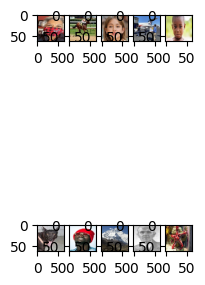

In [139]:
# 테스트 이미지 10장을 2행 5열로 출력
show_image(2, 5, test_images)

# 넘파이 배열로 변환 및 정규화
test_images = np.array(test_images) / 255.0
test_images = test_images.astype('float32')

In [140]:
# 저장된 CNN 모델 불러오기
cnn_model = keras.models.load_model("FACE_DETECTOR.keras")

# 테스트 이미지 예측 수행
cnn_model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[9.9999988e-01, 1.4259354e-07],
       [2.4860081e-09, 1.0000000e+00],
       [9.9941587e-01, 5.8408984e-04],
       [1.7940907e-06, 9.9999821e-01],
       [9.9855965e-01, 1.4403566e-03],
       [9.9999189e-01, 8.0976661e-06],
       [9.9998772e-01, 1.2231923e-05],
       [1.3389244e-05, 9.9998665e-01],
       [9.9917173e-01, 8.2824752e-04],
       [9.8345768e-01, 1.6542329e-02]], dtype=float32)